In [1]:
import time
from pysinewave import SineWave
import serial
import numpy as np
import math
from tqdm import tqdm
%matplotlib widget
import matplotlib.pyplot as plt

freq_start = 0
freq_end = 10000
freq_step = 100

Search for COM-Ports and list them:

In [2]:
import subprocess
cmd = "python -m serial.tools.list_ports"
p = subprocess.Popen(cmd, shell=True, stdout=subprocess.PIPE, stderr=subprocess.STDOUT)
for line in p.stdout.readlines():
    print(line.decode("UTF-8").rstrip("\n"))

COM7                
1 ports found


Connect to COM-Port:

In [3]:
if("ser" in locals()):
    ser.close()
ser = serial.Serial("COM7", 9600, timeout = 1)

#get firmware version
ser.write(b'*idn?\n')
ver=ser.readline().decode("UTF-8")

print(ser.name + " , " + str(ser.is_open) + " , " + ver)

COM7 , True , CONRAD,DSO 4022,BK147048, V1.23



Generate a Sinwave with the headphone port,
measure its frequency and amplitude,
increase the frequency and repeat:

In [4]:
points1, points2 = [], []

if("sinewave" in locals()):
    sinewave.stop()
sinewave = SineWave(pitch_per_second = 1000) #lib wants to transition smoothly between pitches, which i DON'T
sinewave.play()

for frequency in tqdm(range(freq_start, freq_end, freq_step)):
    sinewave.set_frequency(frequency)
    #channel 1
    ser.write(b':meas:sour 1\n')
    ser.write(b':meas:freq?\n')
    freq1 = ser.readline().decode("UTF-8").rstrip("\n")
    ser.write(b':meas:vamp?\n')
    amp1 = ser.readline().decode("UTF-8").rstrip("\n")
    if(freq1 != "  ?" and amp1 != "  ?"):
        points1.append([float(freq1), float(amp1)])
    #channel 2
    ser.write(b':meas:sour 2\n')
    ser.write(b':meas:freq?\n')
    freq2 = ser.readline().decode("UTF-8").rstrip("\n")
    ser.write(b':meas:vamp?\n')
    amp2 = ser.readline().decode("UTF-8").rstrip("\n")
    if(freq2 != "  ?" and amp2 != "  ?"):
        points2.append([float(freq2), float(amp2)])

sinewave.stop()

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [02:47<00:00,  1.67s/it]


Plot those values:

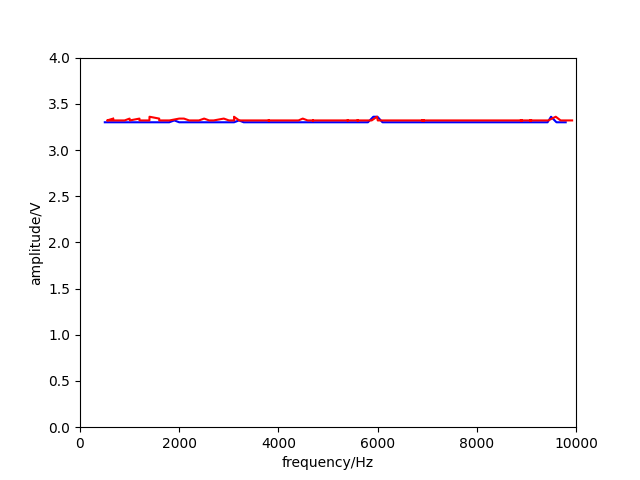

In [5]:
plt.clf()
plt.xlabel("frequency/Hz")
plt.ylabel("amplitude/V")

x1, y1 = np.array(points1).T
plt.plot(x1, y1, 'b-')

x2, y2 = np.array(points2).T
plt.plot(x2, y2, 'r-')

plt.gca().set_xlim([freq_start,freq_end])
plt.gca().set_ylim([0,math.ceil(max(y1))]) #y axis from 0 to next int of highest number

plt.show()